
#### <span style="color:Blue;font-size:1.4em;"><b>LOGISTIC REGRESSION</b></span> 

In [88]:
df["Group"].value_counts()

0    190
1    183
Name: Group, dtype: int64

<b>The dataset is balanced</b>

In [89]:
X=df.drop(["Group"],axis=1)
y=df["Group"]

In [90]:
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.128372
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      251
Method:                           MLE   Df Model:                            9
Date:                Sun, 04 Apr 2021   Pseudo R-squ.:                  0.8147
Time:                        12:18:03   Log-Likelihood:                -33.505
converged:                       True   LL-Null:                       -180.86
Covariance Type:            nonrobust   LLR p-value:                 3.444e-58
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.2042     64.348      2.070      0.038       7.085     259.323
M/F           -2.4664      1.030     -2.394      0.017      -4.486      -0.447
Age           -0.0491      0.067     -0.733      0.463      -0.180       0.082
EDUC          -0.1400      0.200     -0.700      0.484      -0.532       0.252
SES           -1.1414      0.497     -2.297      0.022      -2.116      -0.167
eTIV          -0.0381      0.020     -1.894      0.058      -0.078       0.001
nWBV         -23.0986     15.477     -1.492      0.136     -53.432       7.235
ASF          -32.0922     23.048     -1.392      0.164     -77.265      13.081
MMSE          -2.1685      9.821     -0.221      0.825     -21.418      17.081
CDR           -9.9180      2.307     -4.299      0.000     -14.440      -5.396
==============================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [91]:
y_pred=logreg.predict(X_test)

In [92]:
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [93]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))


### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [94]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        62
           1       0.98      0.86      0.91        50

    accuracy                           0.93       112
   macro avg       0.94      0.92      0.93       112
weighted avg       0.93      0.93      0.93       112



In [96]:
update_score_card(algorithm_name = 'Logistic Regression', model = logreg)
score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462


### <span style="color:Blue;font-size:1.4em;"><b>Feature selection using RFE</b></span> 

In [107]:
from sklearn.feature_selection import RFE

In [108]:
X=df.drop(["Group"],axis=1)
y=df["Group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

linreg_rfe = LogisticRegression()

rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 6)

rfe_model = rfe_model.fit(X_train, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['M/F', 'EDUC', 'SES', 'ASF', 'MMSE', 'CDR'], dtype='object')


In [109]:
X2=df[['EDUC', 'SES', 'nWBV', 'ASF', 'MMSE', 'CDR']]
y2=df["Group"]
X2=sm.add_constant(X2)


In [110]:
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3)

In [111]:

logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.170716
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Group   No. Observations:                  261
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            6
Date:                Sun, 04 Apr 2021   Pseudo R-squ.:                  0.7531
Time:                        12:18:05   Log-Likelihood:                -44.557
converged:                       True   LL-Null:                       -180.48
Covariance Type:            nonrobust   LLR p-value:                 8.735e-56
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3051      9.952      1.638      0.101      -3.201      35.811
EDUC          -0.3457      0.154     -2.252      0.024      -0.647      -0.045
SES           -1.3365      0.400     -3.342      0.001      -2.120      -0.553
nWBV         -10.4000      8.337     -1.247      0.212     -26.741       5.941
ASF            6.8745      2.412      2.851      0.004       2.148      11.601
MMSE          -2.0266      3.555     -0.570      0.569      -8.994       4.941
CDR           -7.3660      1.112     -6.624      0.000      -9.545      -5.187
==============================================================================
"""

In [112]:
y_pred=logreg.predict(X_test)

In [117]:
correct=(TN+TP)/(TN+TP+FP+FN)
print("Correctly classified :",correct*100)

Correctly classified : 96.42857142857143


In [118]:
in_correct=(FN+FP)/(TN+TP+FP+FN)
print("In_Correctly classified :",in_correct*100)

In_Correctly classified : 3.571428571428571


In [119]:
update_score_card(algorithm_name = 'Logistic Regression -RFE', model = logreg)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963


### <span style="color:Blue;font-size:1.4em;"><b>Naive Bayes Classifier</b></span> 



### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [123]:
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       1.00      0.93      0.97        60

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



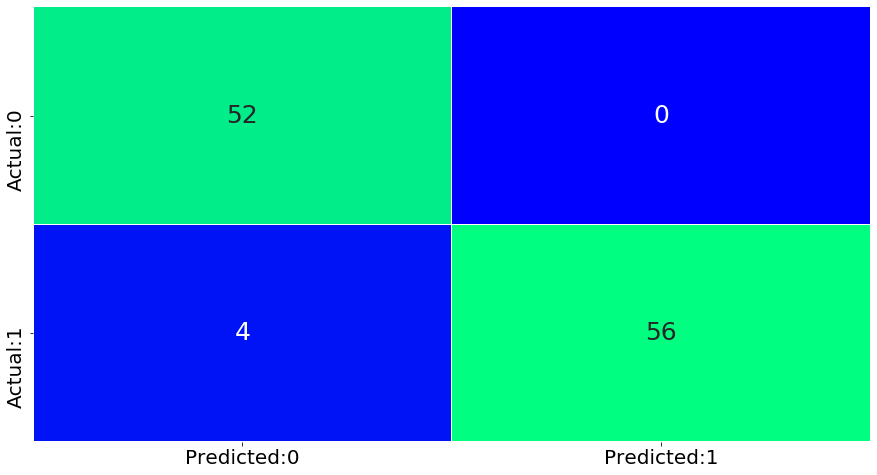

In [124]:
plot_confusion_matrix(gnb_model)

In [126]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [127]:
update_score_card(algorithm_name = 'Naive Bayes', model = gnb_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963


### <span style="color:Blue;font-size:1.4em;"><b>KNearest Neighbour Classifier</b></span> 

In [128]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

In [129]:
y_pred=knn_model.predict(X_test)

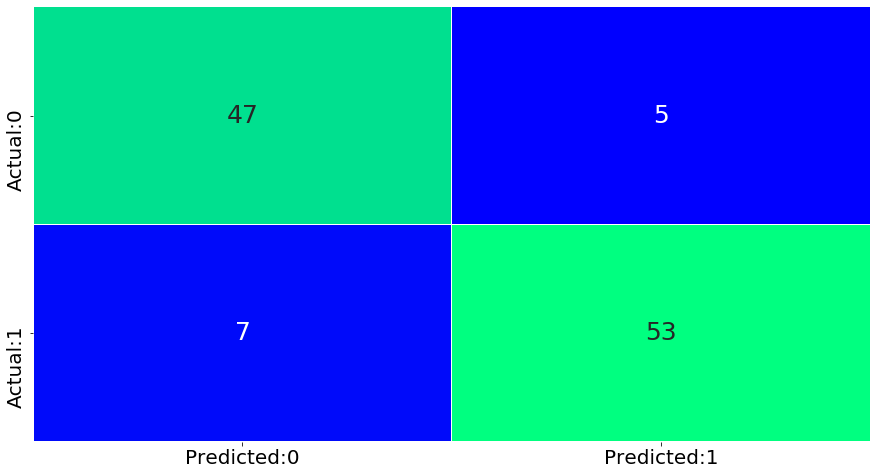

In [130]:
plot_confusion_matrix(knn_model)

In [132]:
cm = confusion_matrix(y_pred,y_test)
TP=cm[0,0]
TN=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]

acc = (TN+TP)/(TN+FP+TP+FN)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
specificity = TN / (TN+FP)
f1_score = 2*((precision*recall)/(precision+recall))

In [133]:
update_score_card(algorithm_name = 'KNN ', model = knn_model)

score_card

,Model_Name,Accuracy,AUC Score,Precision,Recall,F1-Score
0,Logistic Regression,0.928571,0.921935,0.983871,0.897059,0.938462
1,Logistic Regression -Significant Variables,0.955357,0.948946,0.984848,0.942029,0.962963
2,Logistic Regression -RFE,0.964286,0.966667,1.000000,0.928571,0.962963
3,Naive Bayes,0.964286,0.966667,1.000000,0.928571,0.962963
4,KNN,0.892857,0.893590,0.903846,0.870370,0.886792



### <span style="color:Blue;font-size:1.4em;"><b>  Gradient Boosting </b></span> 

In [180]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [181]:
y_pred=gboost_model.predict(X_test)

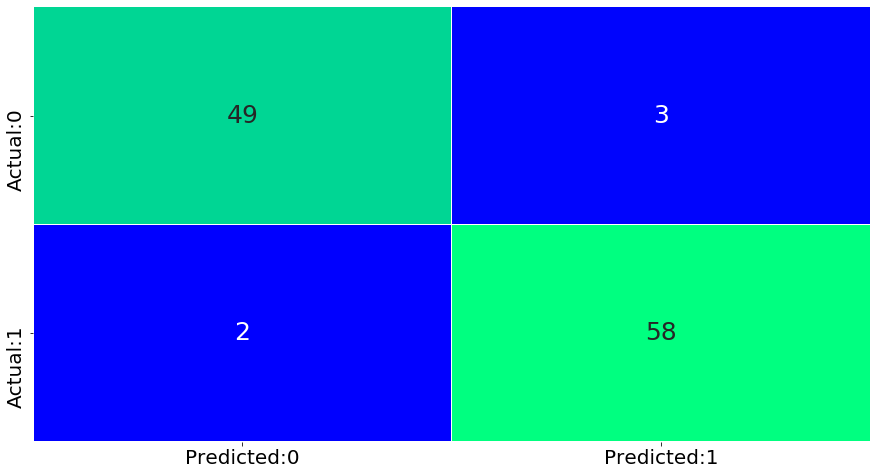

In [182]:
plot_confusion_matrix(gboost_model)


### <span style="color:blue;font-size:1.4em;"><b> Classification Report</b> </span> 

In [183]:
test_report = get_test_report(gboost_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.95      0.97      0.96        60

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112




### <span style="color:Blue;font-size:1.4em;"><b>  XGBOOST </b></span> 

In [187]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(X_train, y_train)

XGBClassifier(gamma=1, max_depth=10)

In [188]:
y_pred=xgb_model.predict(X_test)

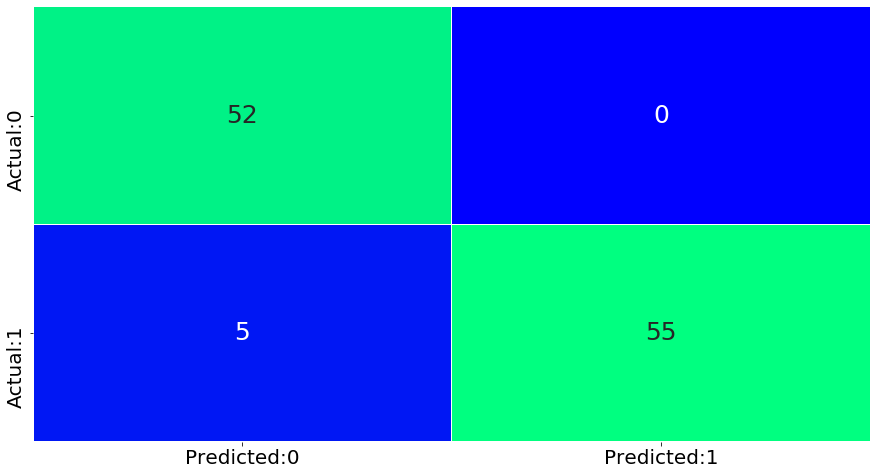

In [189]:

plot_confusion_matrix(xgb_model)